In [1]:
from lambeq.backend.grammar import Word, Ty, Id, Cup, Diagram

In [2]:
# Define grammartical (pregroup) types
N = Ty('n') # noun 
S = Ty('s') # sentence

In [3]:
# Define the words 
bob = Word('Bob', N)
likes = Word('likes', N.r @ S @ N.l)
alice = Word('Alice', N)
he = Word('He', N)
was = Word('was', N.r @ S @ S.l @ N)
happy = Word('happy', N.r @ S)

In [4]:
# Define a discopy diagram 
diagram = bob @ likes @ alice @ he @ was @ happy 
diagram >>= Cup(N, N.r) @ Id(S) @ Cup(N.l, N) @ Cup(N, N.r) @ Id(S) @ diagram.cups(S.l @ N, N.r @ S)

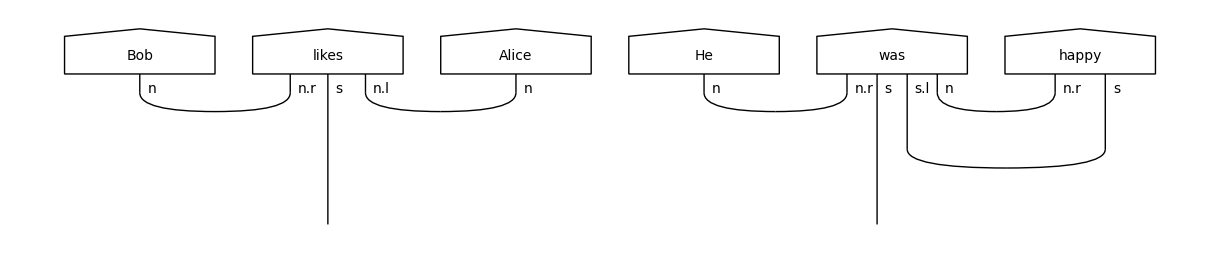

In [5]:
diagram.draw(space=10,figsize=(12,4))

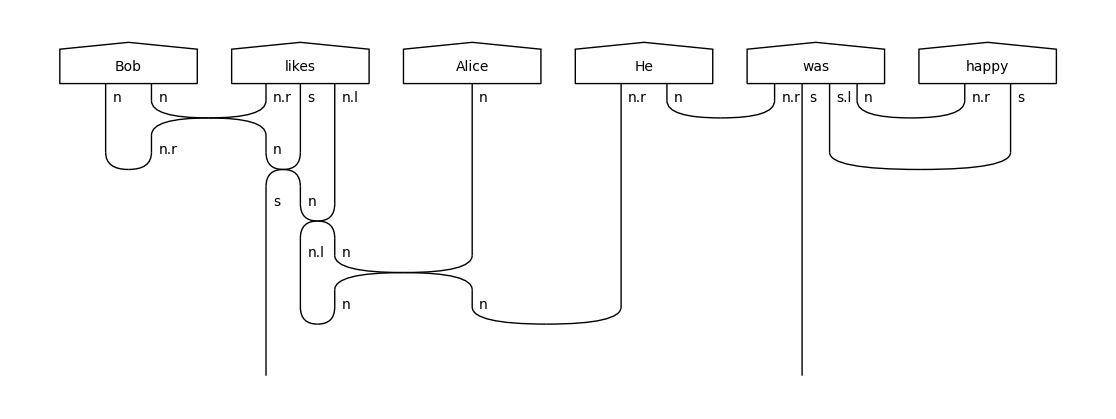

In [6]:
from discopro.anaphora import connect_anaphora
ref_box_idx, pro_box_idx = 0, 3
diagram_connected = connect_anaphora(diagram, pro_box_idx, ref_box_idx)
diagram_connected.draw(space=10,figsize=(12,4))

[1]


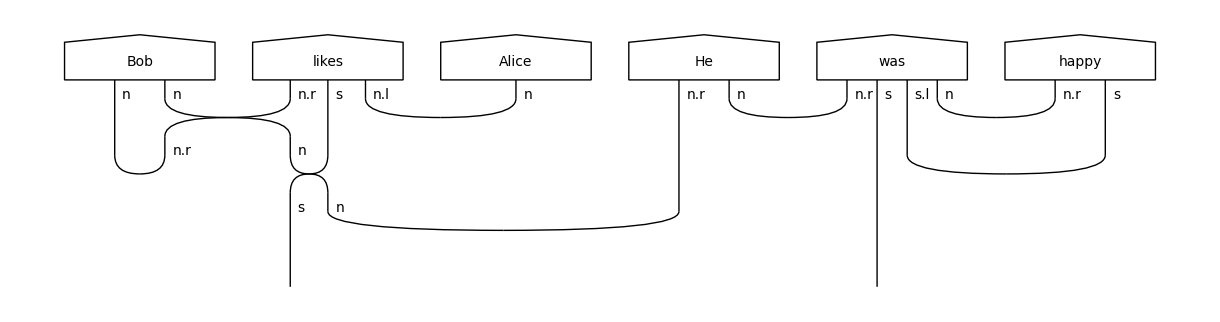

In [7]:
diagram_connected = connect_anaphora(diagram, pro_box_idx, ref_box_idx, min_swaps=True)
diagram_connected.draw(space=10,figsize=(12,4))

In [344]:
cur_diag = diagram
ref_idx = 0
pro_idx = 3
ref_box = cur_diag.boxes[ref_idx]
pro_box = cur_diag.boxes[pro_idx]

In [345]:
last_word_idx = max(i for i, box in enumerate(cur_diag.boxes) if isinstance(box, Word))
words_diag = cur_diag[:last_word_idx+1]
cups_diag = cur_diag[last_word_idx+1:]

In [346]:
left = sum(len(box.cod) for box in words_diag.boxes[:ref_idx+1])
right = sum(len(box.cod) for box in words_diag.boxes[:pro_idx])-1
N = Ty('n')
cup = Cup(N, N.r)
cur_diag = cups_diag

In [347]:
n_diag_dom = len(cur_diag.dom)
wires = list(range(len(cur_diag.dom)))

locals_idx = list()
for i, (box, offset) in enumerate(zip(cur_diag.boxes, cur_diag.offsets)):
    boxl = wires[offset]
    boxr = wires[offset+len(box.dom)-1]
    if left <= boxl and boxr <= right:
        locals_idx.append(i)
    if len(box.cod) == 0:
        wires = wires[:offset] + wires[offset+2:]

In [348]:
from discopro.anaphora import _interchange, _surround_cup
n_locals = len(locals_idx)
for target_idx, local_idx in enumerate(locals_idx):
    cur_diag = _interchange(cur_diag, local_idx, target_idx)

In [349]:
local_boxes = cur_diag[:n_locals]
other_boxes = cur_diag[n_locals:]

In [350]:
local_boxes = Diagram(local_boxes.dom[left:right+1], local_boxes.cod[left:-(n_diag_dom-right)+1], local_boxes.layers)
print(local_boxes.layers)
global_offset = left
for offset, layer in zip(local_boxes.offsets, local_boxes.layers):
    #layer.extend(layer.left[])
    layer.left = layer.left[:-global_offset]
    layer.right = layer.right[:-global_offset]

[|Ty(n) @ Ty(n).r @ Ty(s) @ [CUP; Ty(n).l @ Ty(n) -> Ty()] @ Ty(n) @ Ty(n).r @ Ty(s) @ Ty(s).l @ Ty(n) @ Ty(n).r @ Ty(s)|]


In [351]:
local_boxes.layers

[|Ty(n) @ Ty(n).r @ [CUP; Ty(n).l @ Ty(n) -> Ty()] @ Ty(n) @ Ty(n).r @ Ty(s) @ Ty(s).l @ Ty(n) @ Ty(n).r|]

In [352]:
ids = Diagram(local_boxes.cod, local_boxes.cod, [])
left, right = 0, len(local_boxes.cod) - 1

In [353]:
swaps = ids.swap(cup.dom[0:1], ids.dom[left:right+1])
cups = Id(ids.dom[:left]) @ swaps @ Id(cup.dom[1:] @ ids.dom[right+1:])
cups >>= Id(ids.dom[:right+1]) @ cup @ Id(ids.dom[right+1:])
cups >>= ids

In [354]:
new_diag = Id(cup.dom[:1]) @ local_boxes @ Id(cup.dom[1:])

In [355]:
local_boxes.cod

Ty(n).r @ Ty(s)

In [356]:
print(new_diag.dom)
print(new_diag.cod)

n @ n.r @ s @ n.l @ n @ n.r
n @ n.r @ s @ n.r


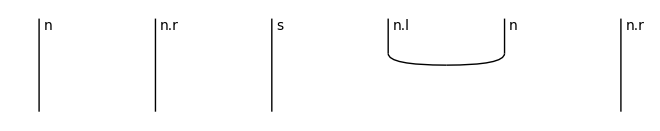

In [357]:
new_diag.draw()

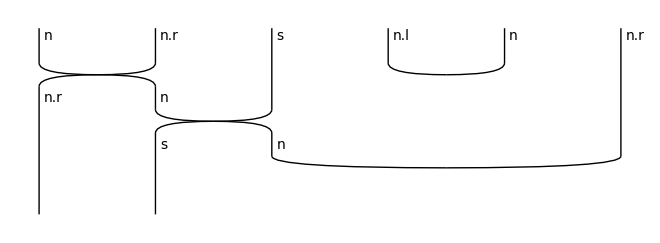

In [358]:
new_diag >>= cups
new_diag.draw()

In [8]:
from discopro.rewriting import contract
diagram_connected = contract(diagram_connected)
diagram_connected.draw(space=10,figsize=(12,4))

ValueError: Invalid permutation for type of length 1: [Ty(n).l]

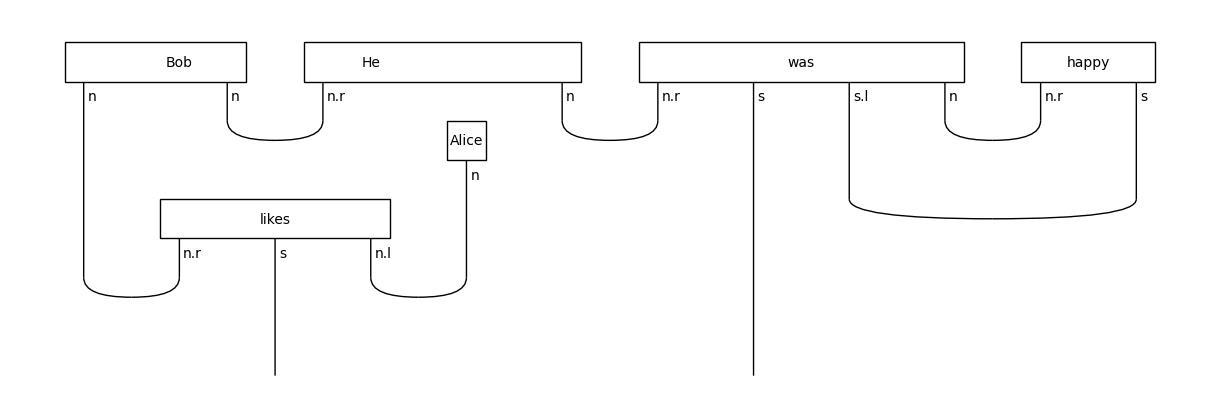

In [9]:
from discopro.anaphora import connect_anaphora_on_top
diagram_connected = connect_anaphora_on_top(diagram, 3, 0)
diagram_connected.draw(space=10,figsize=(12,4))

In [10]:
contract(diagram_connected)

ValueError: Invalid permutation for type of length 2: [Ty(s).l, Ty(n)]